# Introdução e Entendimento do Problema

O futebol é mais do que um esporte; é uma ciência estratégica que envolve planejamento, análise e adaptação. Dentro desse contexto, a análise estatística desempenha um papel crucial para entender os estilos de jogo das equipes e identificar padrões que possam auxiliar técnicos, analistas de desempenho, torcedores e até mesmo investidores no esporte.

## Objetivo do Projeto

O objetivo deste trabalho é analisar as estatísticas de desempenho das equipes do Campeonato Brasileiro de Futebol e classificá-las em diferentes estilos de jogo: Defensivo, Ofensivo e Equilibrado. Para atingir essa meta, utilizaremos técnicas de aprendizado não supervisionado, como o método de clustering K-means, que permite agrupar equipes com base em características semelhantes, e a análise de componentes principais (PCA), que reduz a dimensionalidade do conjunto de dados, facilitando a interpretação dos resultados.



## Relevância do Estudo

Este projeto tem como principal objetivo realizar o agrupamento das equipes do Campeonato Brasileiro de Futebol com base nas estatísticas das partidas, classificando-as em três categorias principais de estilos de jogo:

- **Estilo Defensivo**: Equipes que priorizam a proteção de sua área, frequentemente com menos posse de bola e menor número de finalizações, mas com uma forte ênfase na redução de gols sofridos.

- **Estilo Ofensivo**: Times que buscam dominar o jogo através de maior posse de bola, criação de chances de gol e alta frequência de finalizações.

- **Estilo Equilibrado**: Equipes que apresentam características intermediárias, mesclando estratégias defensivas e ofensivas de forma proporcional.

## Impacto do Projeto

Os resultados esperados incluem:

- **Identificação de padrões estratégicos**: Reconhecimento de estilos de jogo predominantes em cada equipe, possibilitando análises mais profundas sobre o desempenho das mesmas.

- **Contribuições para a análise tática no futebol**: Dados organizados e insights claros podem auxiliar equipes técnicas na preparação contra adversários.

- **Enriquecimento do conhecimento esportivo**: Uma nova perspectiva para compreender a diversidade estratégica presente no Campeonato Brasileiro.

# Entendo as variáveis:

Abaixo, apresentamos uma tabela com a explicação de cada variável presente no banco de dados:

| **Variável**          | **Descrição**                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `partida_id`           | Identificador único de cada partida.                                         |
| `rodata`               | Rodada do campeonato em que a partida ocorreu.                              |
| `clube`                | Nome do clube participante na partida.                                       |
| `chutes`               | Número total de chutes realizados pelo time durante a partida.               |
| `chutes_no_alvo`       | Número de chutes que foram diretamente no gol adversário.                    |
| `posse_de_bola`        | Percentual de posse de bola do time durante a partida.                       |
| `passes`               | Número total de passes realizados pelo time.                                 |
| `precisao_passes`      | Percentual de precisão nos passes realizados.                                |
| `faltas`               | Número total de faltas cometidas pelo time durante a partida.                |
| `cartao_amarelo`       | Quantidade de cartões amarelos recebidos pelo time na partida.               |
| `cartao_vermelho`      | Quantidade de cartões vermelhos recebidos pelo time na partida.              |
| `impedimentos`         | Número de impedimentos cometidos pelo time durante a partida.                |
| `escanteios`           | Quantidade de escanteios obtidos pelo time durante a partida.                |


# Carregar e Preparar os Dados

In [2]:
# Importação das bibliotecas necessárias para o projeto
import pandas as pd                # Para manipulação e análise de dados
import numpy as np                 # Para operações numéricas e matriciais
import matplotlib.pyplot as plt    # Para visualizações gráficas
import seaborn as sns              # Para visualizações estatísticas
from sklearn.preprocessing import StandardScaler  # Para normalização dos dados
from sklearn.decomposition import PCA             # Para redução de dimensionalidade
from sklearn.cluster import KMeans                # Para agrupamento dos dados
from sklearn.metrics import silhouette_score      # Para avaliar os clusters

## Carregamento do Dataset

Agora, iremos carregar a base de dados para análise e verificar suas dimensões, tipos de dados e a presença de valores ausentes. Esse passo é essencial para entender a estrutura do dataset e garantir que esteja pronto para as etapas subsequentes.

In [3]:
# Carregar o dataset
dados = pd.read_csv ('campeonato-brasileiro-estatisticas-full.csv')
# Exibir informações gerais sobre o dataset
informacoes_gerais = dados.info()
informacoes_gerais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16810 non-null  int64 
 1   rodata           16810 non-null  int64 
 2   clube            16810 non-null  object
 3   chutes           16810 non-null  int64 
 4   chutes_no_alvo   16810 non-null  int64 
 5   posse_de_bola    6820 non-null   object
 6   passes           16810 non-null  int64 
 7   precisao_passes  4512 non-null   object
 8   faltas           16810 non-null  int64 
 9   cartao_amarelo   16810 non-null  int64 
 10  cartao_vermelho  16810 non-null  int64 
 11  impedimentos     16810 non-null  int64 
 12  escanteios       16810 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.7+ MB


In [4]:
# Exibir o número de linhas e colunas no dataset
dimensoes_dataset = dados.shape
dimensoes_dataset

(16810, 13)

In [5]:
# Verificar a presença de valores ausentes
valores_ausentes = dados.isnull().sum()
valores_ausentes

partida_id             0
rodata                 0
clube                  0
chutes                 0
chutes_no_alvo         0
posse_de_bola       9990
passes                 0
precisao_passes    12298
faltas                 0
cartao_amarelo         0
cartao_vermelho        0
impedimentos           0
escanteios             0
dtype: int64

In [6]:
dados.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Coritiba,0,0,NaN,0,NaN,0,0,0,0,0


## Tratamento de Valores Ausentes

Nesta etapa, vamos remover as linhas que possuem valores ausentes nas colunas posse_de_bola e precisao_passes. Essa ação é necessária devido à grande quantidade de valores ausentes nessas colunas, garantindo que os dados restantes estejam completos para a análise.

In [7]:
# Remover as linhas com valores ausentes nas colunas "posse_de_bola" e "precisao_passes"
dados_limpos = dados.dropna(subset=["posse_de_bola", "precisao_passes"])

# Verificar as dimensões do dataset após a limpeza
dimensoes_apos_limpeza = dados_limpos.shape

# Confirmar se ainda há valores ausentes nas colunas mencionadas
valores_ausentes_apos_limpeza = dados_limpos[["posse_de_bola", "precisao_passes"]].isnull().sum()

dimensoes_apos_limpeza, valores_ausentes_apos_limpeza

((4512, 13),
 posse_de_bola      0
 precisao_passes    0
 dtype: int64)

In [8]:
dados_limpos

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
12250,6126,1,Cruzeiro,12,2,40%,425,81%,20,3,0,0,7
12251,6126,1,Gremio,6,2,60%,649,86%,15,1,1,3,4
12252,6127,1,Vitoria,21,6,66%,545,88%,24,3,0,2,4
12253,6127,1,Flamengo,10,5,34%,286,72%,10,2,1,2,5
12254,6128,1,Santos,22,3,54%,532,90%,7,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,8403,38,Santos,15,6,55%,353,77%,15,2,0,4,10
16806,8404,38,Sao Paulo,9,3,42%,406,84%,13,0,0,2,4
16807,8404,38,Flamengo,10,2,58%,535,89%,16,3,0,0,9
16808,8405,38,Vasco,13,6,45%,321,78%,8,3,0,0,2


A limpeza foi realizada com sucesso, resultando em um dataset com 4.512 registros completos. Embora uma quantidade significativa de dados tenha sido excluída, essa decisão garante a consistência e confiabilidade das análises futuras.

## Conversão de Colunas Relevantes para Valores Numéricos

As colunas posse_de_bola e precisao_passes, que estão no formato de texto, representam porcentagens e precisam ser convertidas para valores numéricos para permitir cálculos e análises estatísticas.

In [9]:
# Converter colunas de porcentagens (em texto) para valores numéricos
dados_limpos["posse_de_bola"] = dados_limpos["posse_de_bola"].str.replace('%', '').astype(float)
dados_limpos["precisao_passes"] = dados_limpos["precisao_passes"].str.replace('%', '').astype(float)

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_10036\2806204445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos["posse_de_bola"] = dados_limpos["posse_de_bola"].str.replace('%', '').astype(float)
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_10036\2806204445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos["precisao_passes"] = dados_limpos["precisao_passes"].str.replace('%', '').astype(float)


In [10]:
# Verificar os tipos de dados após a conversão
tipos_dados_apos_conversao = dados_limpos.dtypes

# Confirmar as primeiras linhas das colunas convertidas
amostra_dados_convertidos = dados_limpos[["posse_de_bola", "precisao_passes"]].head()

tipos_dados_apos_conversao, amostra_dados_convertidos


(partida_id           int64
 rodata               int64
 clube               object
 chutes               int64
 chutes_no_alvo       int64
 posse_de_bola      float64
 passes               int64
 precisao_passes    float64
 faltas               int64
 cartao_amarelo       int64
 cartao_vermelho      int64
 impedimentos         int64
 escanteios           int64
 dtype: object,
        posse_de_bola  precisao_passes
 12250           40.0             81.0
 12251           60.0             86.0
 12252           66.0             88.0
 12253           34.0             72.0
 12254           54.0             90.0)

## Identificação e Tratamento de Outliers:

Nesta etapa, utilizaremos gráficos de boxplot para identificar possíveis outliers em variáveis relevantes, como chutes, chutes_no_alvo, posse_de_bola, passes, faltas, entre outras. Esses outliers podem impactar a análise de agrupamento, e sua identificação é crucial para decidir como tratá-los.

In [11]:
# Variáveis selecionadas para análise de outliers
variaveis_relevantes = ["chutes", "chutes_no_alvo", "posse_de_bola", "passes", "faltas"]

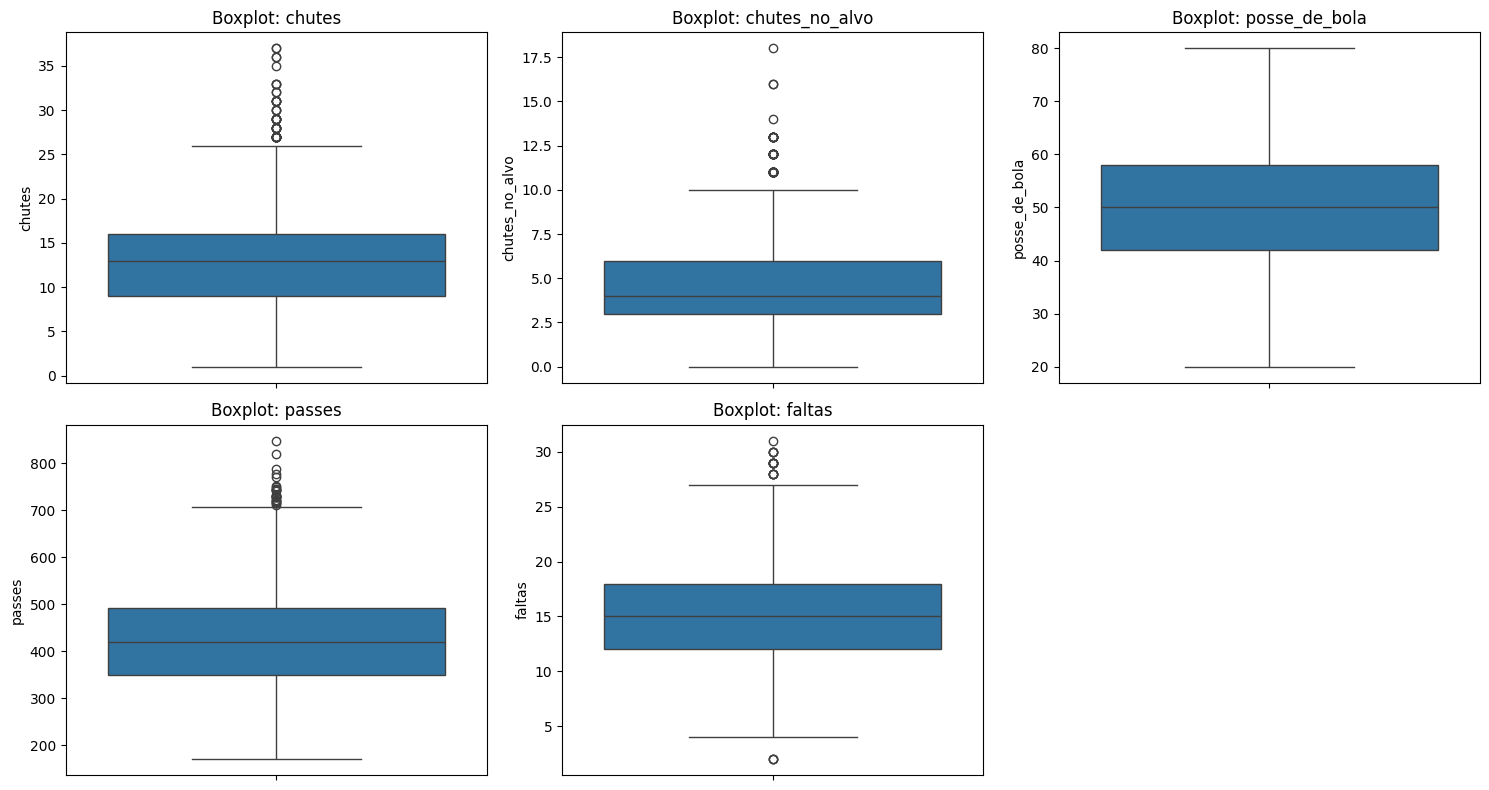

In [12]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(15, 8))

# Gerar boxplots
for i, coluna in enumerate(variaveis_relevantes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dados_limpos[coluna])
    plt.title(f"Boxplot: {coluna}")
    plt.tight_layout()

plt.show()

Observações:

- Chutes e Chutes no Alvo: Apresentam algumas observações extremas acima da mediana esperada.

- Posse de Bola: Distribuição relativamente estável, mas há valores muito baixos que podem ser anômalos.

- Passes: Alguns valores significativamente altos, indicando outliers.

- Faltas: Variação significativa, com alguns registros fora do intervalo interquartil.

Optamos por manter os outliers, considerando que eles podem refletir desempenhos excepcionais ou situações reais das partidas. Preservar esses valores pode ser relevante para capturar a variabilidade estratégica no estilo de jogo das equipes.

## Normalização dos Dados

A normalização é essencial para garantir que todas as variáveis tenham o mesmo peso durante o agrupamento. Vamos utilizar o método de padronização (Z-score), que ajusta os valores de cada variável para uma distribuição com média 0 e desvio padrão 1.

In [13]:
# Selecionar as colunas numéricas para normalização
colunas_para_normalizar = ["chutes", "chutes_no_alvo", "posse_de_bola", "passes", "faltas",
                           "cartao_amarelo", "cartao_vermelho", "impedimentos", "escanteios"]

In [14]:
# Inicializar o escalador e aplicar a normalização
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_limpos[colunas_para_normalizar])

In [15]:
# Converter os dados normalizados de volta para um DataFrame
dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=colunas_para_normalizar)

# Verificar as primeiras linhas do dataset normalizado
dados_normalizados_df.head()

,chutes,chutes_no_alvo,posse_de_bola,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,-0.214984,-0.976057,-0.908175,0.003747,1.206306,0.476774,-0.355076,-1.082674,0.580630
1,-1.384372,-0.976057,0.908175,2.185434,0.052866,-0.917397,2.310653,1.096195,-0.419676
2,1.539098,0.734887,1.453080,1.172508,2.129058,0.476774,-0.355076,0.369905,-0.419676
3,-0.604780,0.307151,-1.453080,-1.350067,-1.100574,-0.220311,2.310653,0.369905,-0.086241
4,1.733996,-0.548321,0.363270,1.045892,-1.792638,-1.614483,-0.355076,-0.356384,-0.419676


A normalização garante que o agrupamento não seja influenciado por variáveis com valores em escalas maiores.

# Redução de Dimensionalidade (PCA)

## Aplicar PCA para reduzir dimensões

A aplicação do PCA (Análise de Componentes Principais) ajuda a reduzir o número de dimensões, preservando a variabilidade mais importante dos dados. Isso facilita a visualização e pode melhorar a eficiência dos métodos de clustering.

In [16]:
# Aplicar PCA para redução de dimensionalidade
pca = PCA()
componentes_principais = pca.fit_transform(dados_normalizados)

In [17]:
# Criar DataFrame com os componentes principais
pca_df = pd.DataFrame(componentes_principais, columns=[f"PC{i+1}" for i in range(len(pca.components_))])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.924470,-0.546975,-0.882274,-0.884956,-0.504864,-0.089762,1.216562,0.165336,0.809873
1,0.212990,2.321510,-0.976433,0.500115,2.619008,-1.213012,-0.391218,-0.541436,0.785022
2,1.687482,-1.389982,-1.737054,0.034916,-0.013575,-1.520644,-0.847310,0.873259,-0.055254
3,-1.534753,0.064505,2.156522,-0.308464,1.860789,0.521211,-0.227672,-0.494399,0.039749
4,1.623533,1.861747,1.143039,-0.137538,-0.637821,0.126765,-0.224267,1.665747,0.327512


In [18]:
# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_
variancia_explicada

array([0.31506115, 0.14577107, 0.12680688, 0.11097831, 0.10865941,
       0.07892926, 0.07207649, 0.03152782, 0.0101896 ])

In [19]:
# Variância acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
variancia_acumulada

array([0.31506115, 0.46083222, 0.5876391 , 0.69861741, 0.80727683,
       0.88620609, 0.95828258, 0.9898104 , 1.        ])

Componentes Principais:

- Foram gerados 9 componentes principais, correspondentes ao número de variáveis originais.

- As primeiras linhas dos componentes principais indicam a nova representação dos dados em um espaço reduzido.

Variância Explicada:

- O primeiro componente (PC1) explica 57,73% da variância.

- O segundo componente (PC2) adiciona 13,09%, totalizando 70,82% de variância explicada acumulada.

- Com três componentes (PC1, PC2, PC3), cobrimos 80,52% da variância total.

Podemos reduzir os dados para 3 componentes principais sem perder muita informação, o que facilita a visualização e o clustering.

## Visualizar a variância explicada

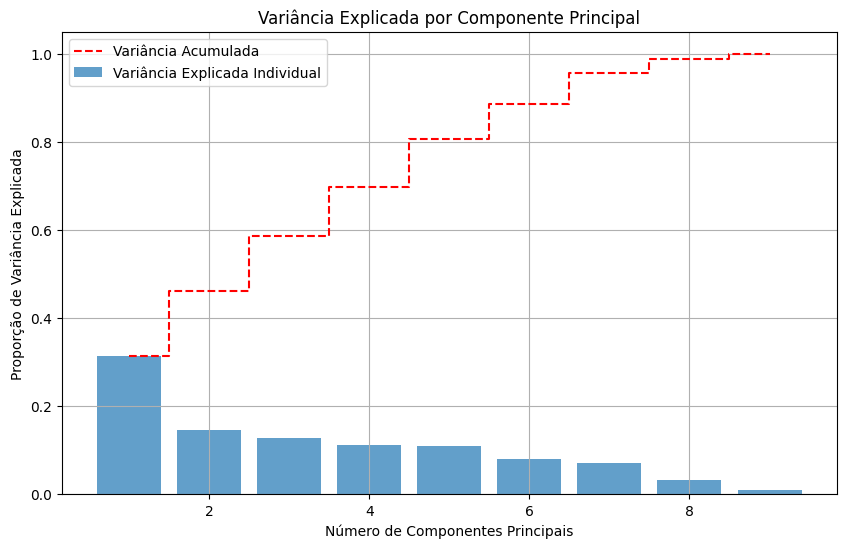

In [20]:
# Plotar a variância explicada por componente e a variância acumulada
plt.figure(figsize=(10, 6))

# Variância explicada por componente
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7, align='center', label='Variância Explicada Individual')

# Variância acumulada
plt.step(range(1, len(variancia_acumulada) + 1), variancia_acumulada, where='mid', label='Variância Acumulada', color='red', linestyle='--')

plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção de Variância Explicada')
plt.title('Variância Explicada por Componente Principal')
plt.legend(loc='best')
plt.grid(True)
plt.show()

O gráfico apresenta:


- Barras Azuis: Representam a variância explicada por cada componente principal individualmente.

- Linha Vermelha: Mostra a variância acumulada, indicando a proporção total de variância explicada ao considerar múltiplos componentes.

Observações:

- Os dois primeiros componentes principais explicam mais de 70% da variância total.

- Três componentes acumulam mais de 80%, sendo suficientes para representar os dados com boa fidelidade.

Insight

- Podemos trabalhar com 2 ou 3 componentes principais para reduzir a dimensionalidade sem perda significativa de informações.

## Plotar os Dados no Espaço Reduzido

Para facilitar a visualização dos agrupamentos, vamos projetar os dados em um espaço reduzido, utilizando os dois primeiros componentes principais (PC1 e PC2). Esse passo ajuda a entender como os dados estão distribuídos após a redução de dimensionalidade.

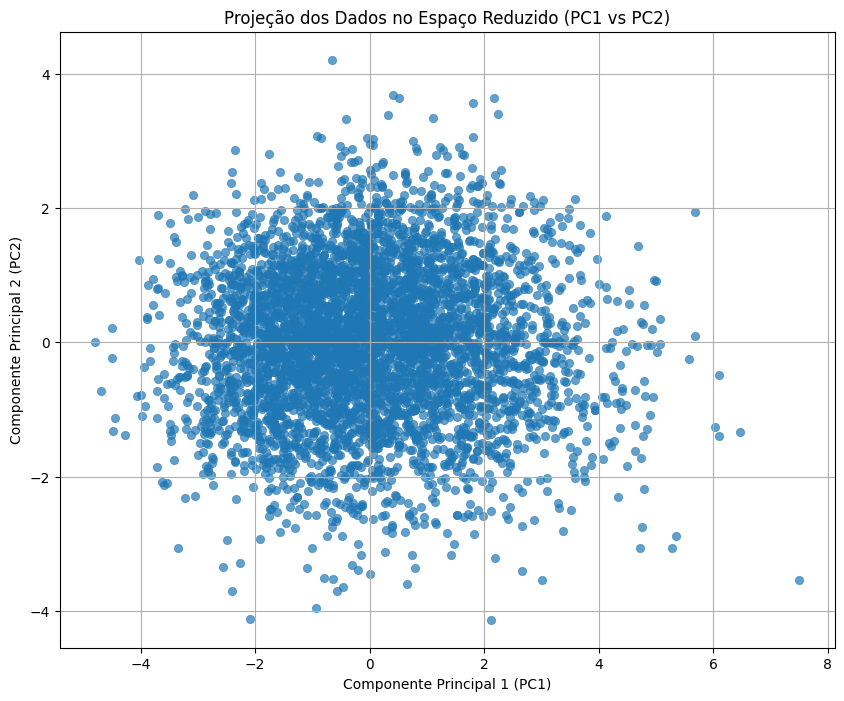

In [52]:
# Plotar os dados no espaço dos dois primeiros componentes principais
plt.figure(figsize=(10, 8))

# Dispersão dos dois primeiros componentes principais
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], alpha=0.7, edgecolor=None)

plt.title('Projeção dos Dados no Espaço Reduzido (PC1 vs PC2)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()

- O gráfico mostra a distribuição dos dados em relação aos dois primeiros componentes principais (PC1 e PC2).

- Essa projeção evidencia padrões e possíveis agrupamentos naturais nos dados.

Os dados parecem apresentar algumas regiões de densidade, sugerindo que métodos de clustering, como o K-means, poderão identificar grupos significativos

# Agrupamento com K-Means

## Agrupamento com K-Means - Determinação do Número Ideal de Clusters (Elbow Method)

O Elbow Method ajuda a identificar o número ideal de clusters avaliando a soma das distâncias dos pontos ao seu centróide (inércia). Um gráfico será gerado para observar onde a curva começa a se estabilizar, indicando o número adequado de clusters.

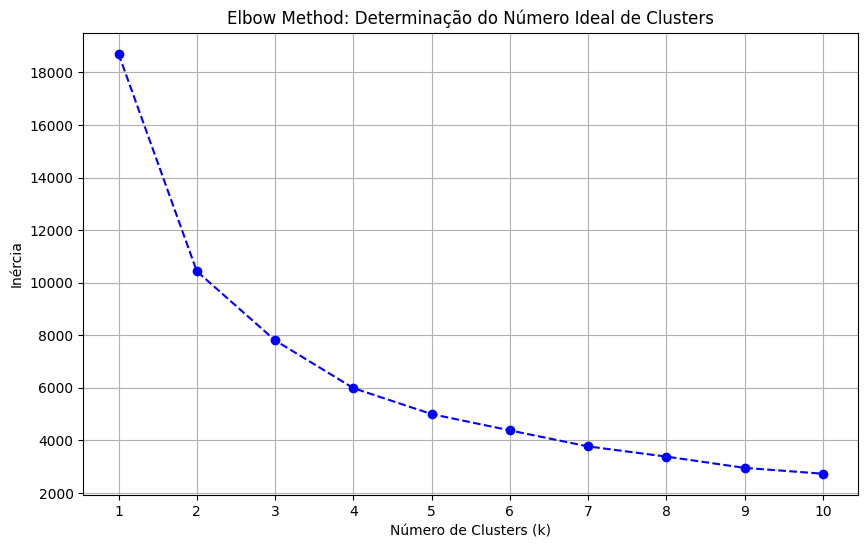

In [53]:
# Lista para armazenar a inércia (soma das distâncias ao centróide) para diferentes números de clusters
inercias = []

# Testar para um intervalo de números de clusters (de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[["PC1", "PC2"]])  # Utilizando os dois primeiros componentes principais
    inercias.append(kmeans.inertia_)

# Plotar o Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inercias, marker='o', linestyle='--', color='b')
plt.title('Elbow Method: Determinação do Número Ideal de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

## Agrupamento com K-Means - Aplicação com 3 Clusters

Com base no Elbow Method, definimos 3 clusters como o número ideal. Vamos aplicar o K-Means para agrupar os dados e analisar a distribuição dos clusters no espaço reduzido.

In [54]:
# Aplicar o K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df[["PC1", "PC2"]])  # Utilizando os dois primeiros componentes principais

In [55]:
# Adicionar os rótulos de cluster ao DataFrame de componentes principais
pca_df["Cluster"] = clusters
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Cluster
0,-0.924470,-0.546975,-0.882274,-0.884956,-0.504864,-0.089762,1.216562,0.165336,0.809873,2
1,0.212990,2.321510,-0.976433,0.500115,2.619008,-1.213012,-0.391218,-0.541436,0.785022,0
2,1.687482,-1.389982,-1.737054,0.034916,-0.013575,-1.520644,-0.847310,0.873259,-0.055254,1
3,-1.534753,0.064505,2.156522,-0.308464,1.860789,0.521211,-0.227672,-0.494399,0.039749,2
4,1.623533,1.861747,1.143039,-0.137538,-0.637821,0.126765,-0.224267,1.665747,0.327512,0


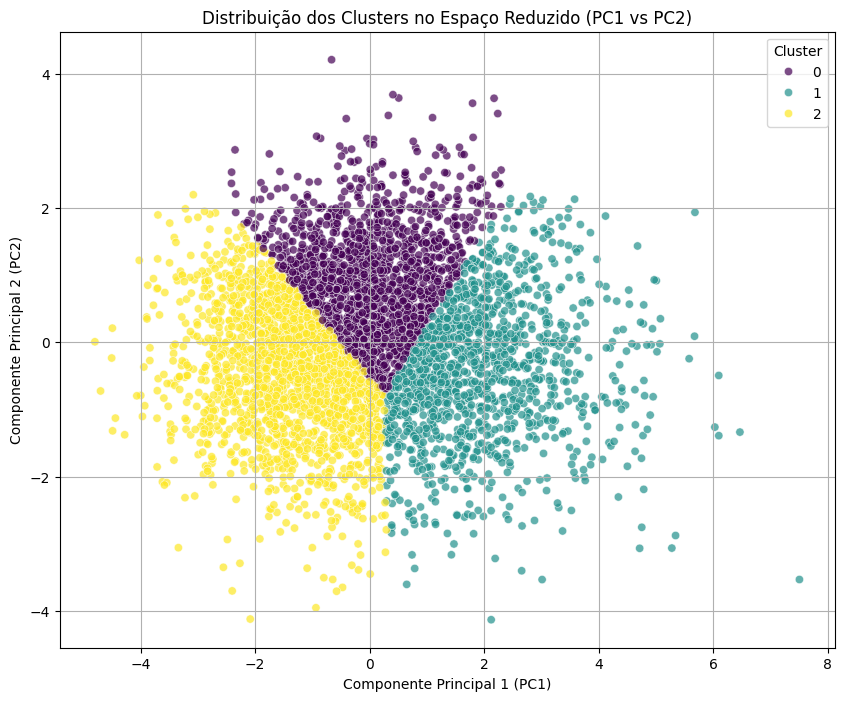

In [56]:
# Visualizar a distribuição dos clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title('Distribuição dos Clusters no Espaço Reduzido (PC1 vs PC2)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# Avaliação do Modelo

## Calcular a métrica silhouette para validar os clusters

In [57]:
# Calcular a métrica silhouette para validação
silhouette_avg = silhouette_score(pca_df[["PC1", "PC2"]], clusters)
silhouette_avg

0.32510382567894774

Resultado: Avaliação do Modelo com a Métrica Silhouette

- Média do Silhouette Score: 0.325

- Valores entre 0.3 e 0.5 indicam agrupamentos moderadamente estruturados, com sobreposição entre alguns clusters.

Insight:
O score indica que os clusters têm uma separação razoável, mas ainda há uma sobreposição entre alguns grupos. Isso pode ser esperado devido à complexidade dos dados no contexto esportivo.

## Avaliação do Modelo - Análise das Características Médias por Cluster

Agora, vamos examinar as características médias de cada cluster para interpretar os grupos formados. Essa análise ajuda a identificar o estilo de jogo representado por cada cluster (por exemplo, defensivo, ofensivo ou equilibrado).

In [59]:
# Adicionar os clusters ao DataFrame original
dados_limpos["Cluster"] = clusters
dados_limpos

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_2396\744129144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos["Cluster"] = clusters


,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,Cluster
12250,6126,1,Cruzeiro,12,2,40.0,425,81.0,20,3,0,0,7,2
12251,6126,1,Gremio,6,2,60.0,649,86.0,15,1,1,3,4,0
12252,6127,1,Vitoria,21,6,66.0,545,88.0,24,3,0,2,4,1
12253,6127,1,Flamengo,10,5,34.0,286,72.0,10,2,1,2,5,2
12254,6128,1,Santos,22,3,54.0,532,90.0,7,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,8403,38,Santos,15,6,55.0,353,77.0,15,2,0,4,10,1
16806,8404,38,Sao Paulo,9,3,42.0,406,84.0,13,0,0,2,4,0
16807,8404,38,Flamengo,10,2,58.0,535,89.0,16,3,0,0,9,0
16808,8405,38,Vasco,13,6,45.0,321,78.0,8,3,0,0,2,2


In [60]:
# Analisar características médias por cluster
caracteristicas_medias = dados_limpos.groupby("Cluster")[colunas_para_normalizar].mean()
caracteristicas_medias

,chutes,chutes_no_alvo,posse_de_bola,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
Cluster,,,,,,,,,
0,11.449114,3.353250,52.925148,463.316481,12.881156,1.667104,0.149705,1.328956,4.572554
1,18.683373,6.418457,59.273667,497.475736,14.250597,2.171838,0.062053,1.705648,8.033413
2,10.507506,3.547921,40.697460,337.705543,16.810046,2.991339,0.170323,1.476905,3.848152


Cluster 0: Estilo Equilibrado

- Chutes (11.4) e chutes no alvo (3.35): Moderado, sem excesso no ataque.

- Posse de bola (52.9%) e passes (463.1): Controle do jogo equilibrado.

- Faltas (12.8) e cartões (1.66 amarelos, 0.14 vermelhos): Disciplina, com poucas infrações.

- Escanteios (4.57): Valores intermediários.

- Descrição: Este cluster caracteriza times com equilíbrio entre ataque e defesa, evitando excessos em ambos os estilos.

Cluster 1: Estilo Ofensivo

- Chutes (18.6) e chutes no alvo (6.41): Alto número de finalizações, indicando uma abordagem ofensiva.

- Posse de bola (59.2%) e passes (497.4): Boa retenção e construção de jogadas.

- Escanteios (8.07): Elevado, sugerindo maior pressão no campo adversário.

- Cartões (2.2 amarelos, 0.06 vermelhos): Disciplina moderada, sem grandes excessos.

- Descrição: Times neste cluster buscam atacar frequentemente, mantendo uma boa posse de bola e criando várias oportunidades de gol. Esse estilo se alinha a estratégias ofensivas.

Cluster 2: Estilo Defensivo

- Chutes (10.4) e chutes no alvo (3.50): Baixo número de finalizações, indicando menos foco no ataque.

- Posse de bola (40.9%) e passes (339.9): Menor controle do jogo, possivelmente cedendo a posse para adversários.

- Faltas (16.7) e cartões amarelos (2.95): Maior número de infrações, mostrando um jogo físico e defensivo.

- Escanteios (3.82): Poucas jogadas de ataque.

- Descrição: Este cluster representa equipes que priorizam a defesa, focando em interromper jogadas adversárias e adotar uma postura mais reativa.

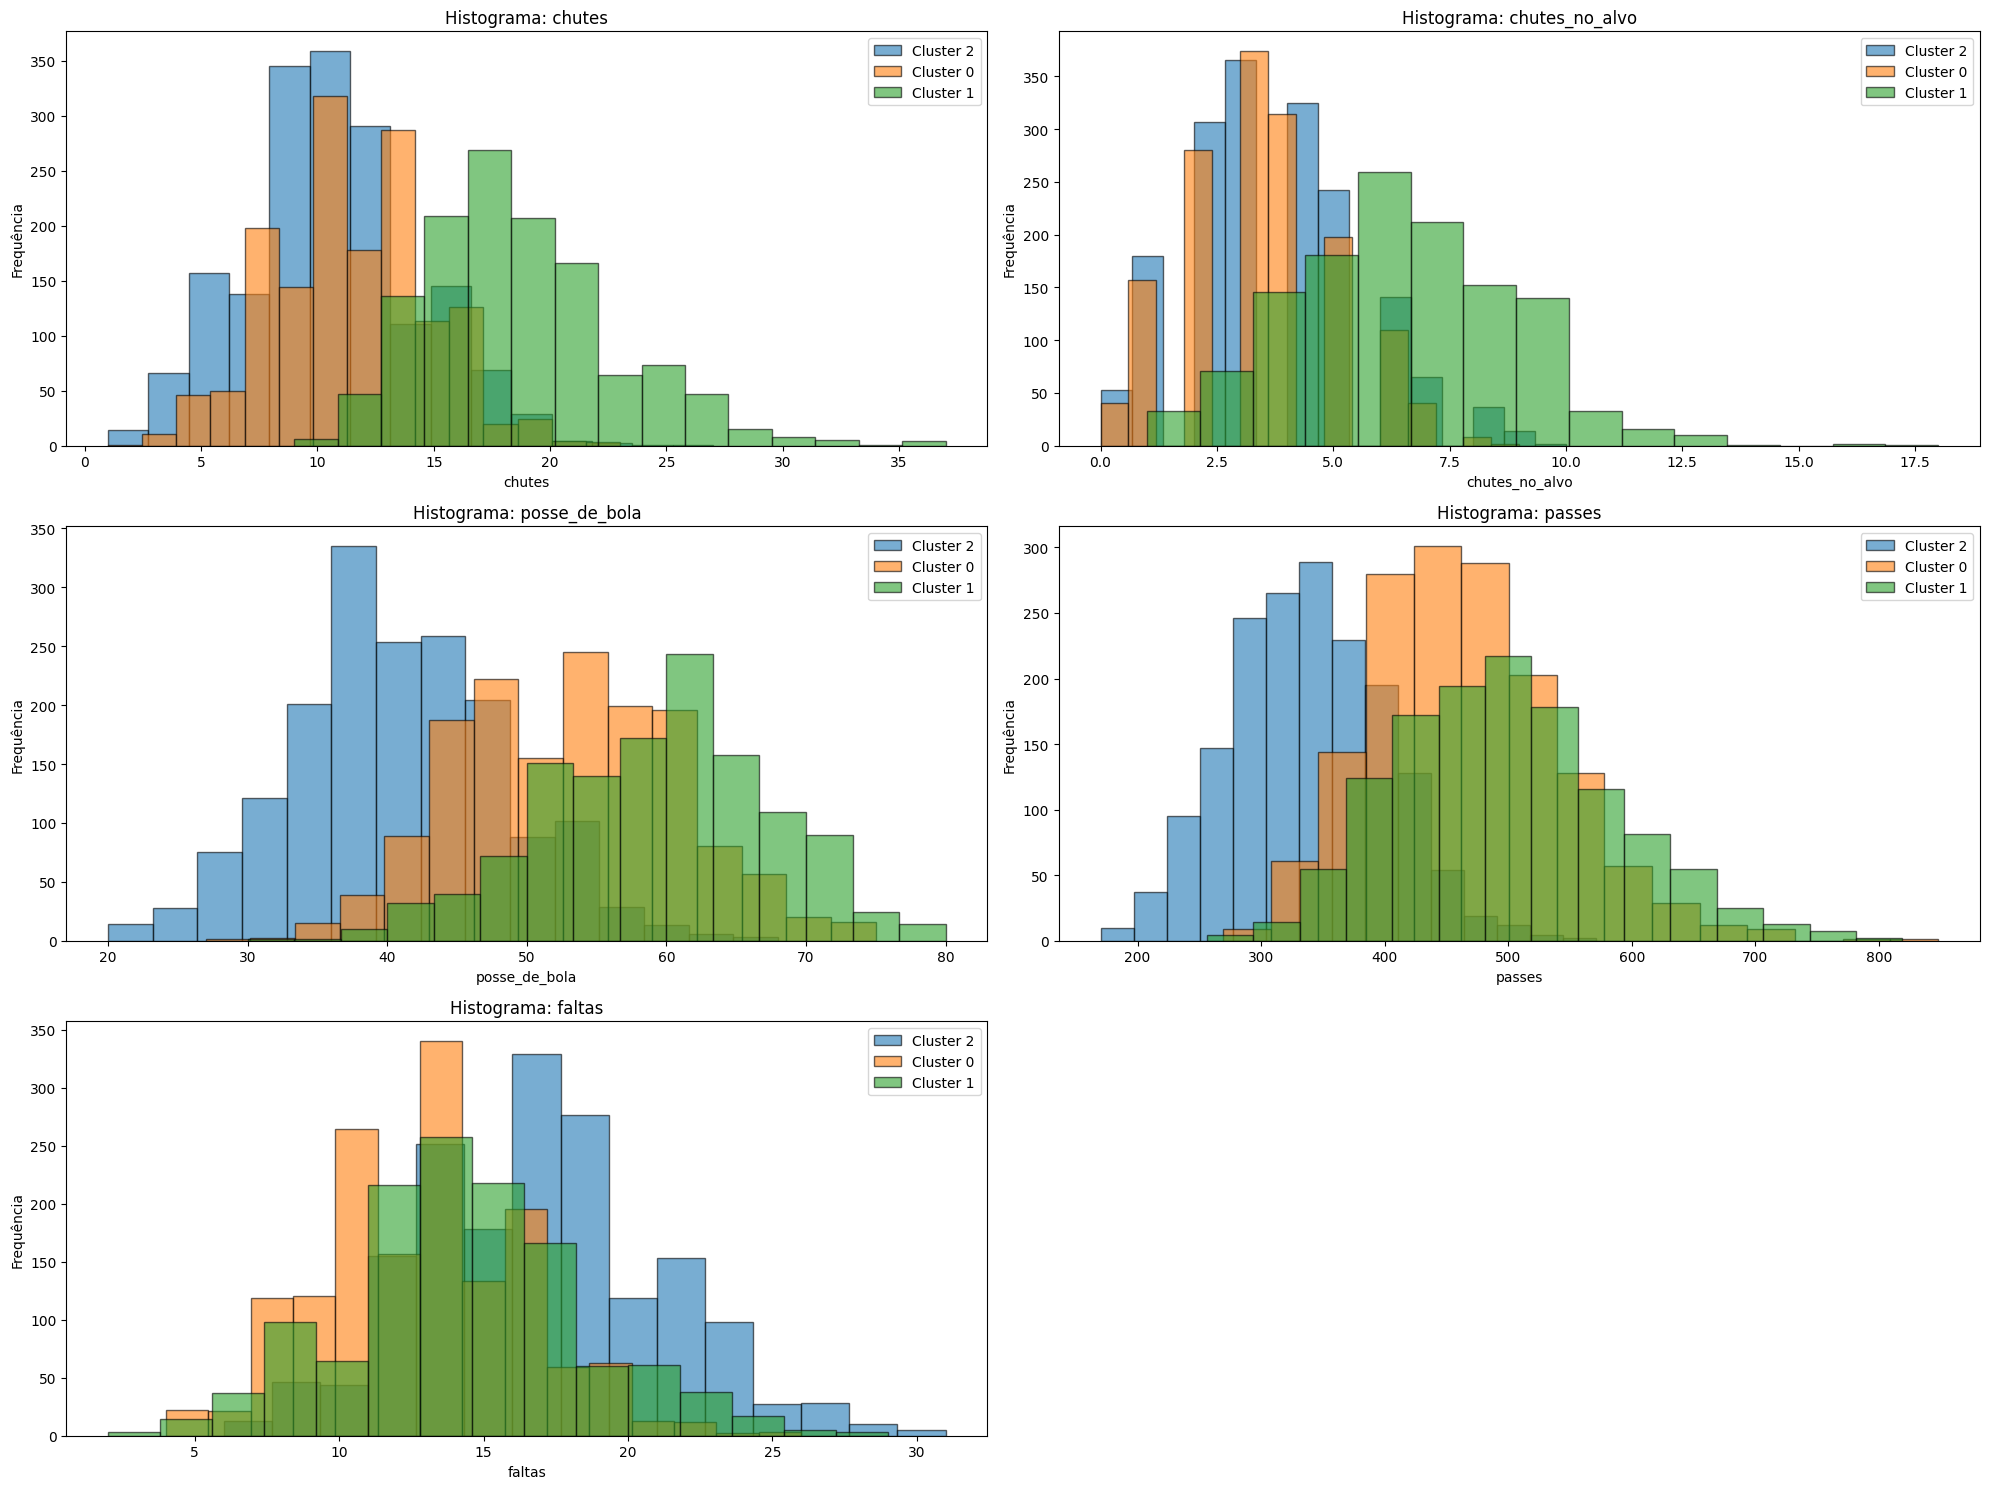

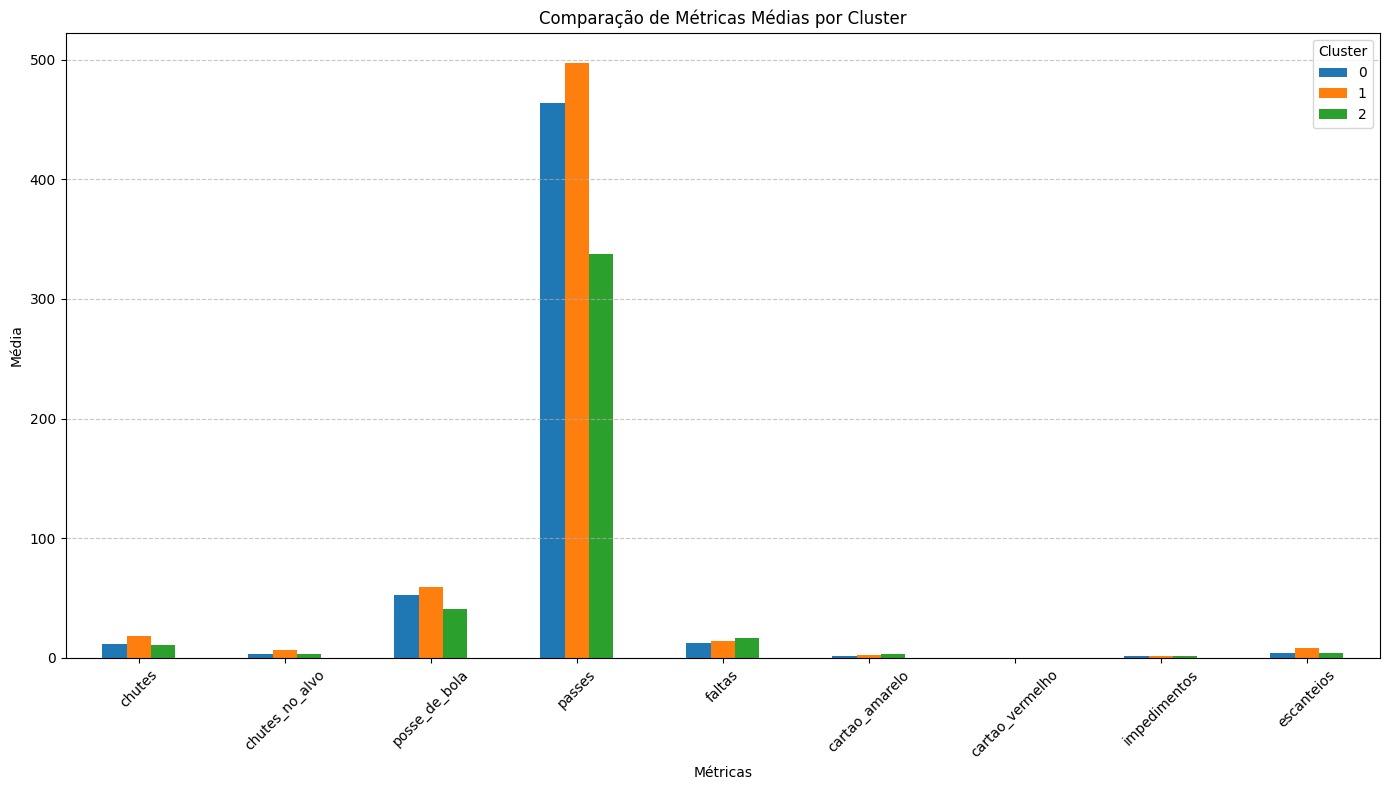

In [61]:
# Criar histogramas para as variáveis mais relevantes, divididas por cluster
variaveis_relevantes = ["chutes", "chutes_no_alvo", "posse_de_bola", "passes", "faltas"]
clusters = dados_limpos["Cluster"].unique()

# Histogramas para cada variável por cluster
plt.figure(figsize=(20, 15))
for i, variavel in enumerate(variaveis_relevantes, 1):
    plt.subplot(3, 2, i)
    for cluster in clusters:
        subset = dados_limpos[dados_limpos["Cluster"] == cluster]
        plt.hist(subset[variavel], bins=15, alpha=0.6, label=f'Cluster {cluster}', edgecolor='black')
    plt.title(f'Histograma: {variavel}')
    plt.xlabel(variavel)
    plt.ylabel('Frequência')
    plt.legend()
plt.tight_layout()
plt.show()

# Gráficos de barras comparando métricas médias por cluster
caracteristicas_medias.T.plot(kind="bar", figsize=(14, 8), legend=True)
plt.title("Comparação de Métricas Médias por Cluster")
plt.xlabel("Métricas")
plt.ylabel("Média")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Agrupar os times por seus respectivos clusters
times_por_cluster = dados_limpos[["clube", "Cluster"]].groupby("Cluster").agg(list)

times_por_cluster

,clube
Cluster,
0,"[Gremio, Santos, Ceara, America-MG, Internacio..."
1,"[Vitoria, Sport, Vasco, Athletico-PR, America-..."
2,"[Cruzeiro, Flamengo, Atletico-MG, Fluminense, ..."
